In [1]:
import os
from textwrap import wrap


def lineData(line):
    raw = line.split("INFO: ")[1].replace("[", "").replace("]", "")
    epoch = raw.split(", ")[0].replace(" ", "").split(":")[1].replace(",", "")
    iter = raw.split(", ")[1].replace(" ", "").split(":")[1].replace(",", "")
    meta = {"epoch": int(epoch), "iter": int(iter)}
    rest = list(
        filter(
            None,
            (
                raw.split(", ")[2]
                .replace("(", "")
                .replace(",)", "")
                .replace(": ", ":")
                .split(" ")
            ),
        )
    )
    data = {
        line.split(":")[0]: float(line.split(":")[1])
        for line in rest
        if "lr" not in line.split(":")[0]
    }

    return {**meta, **data}


def logData(filepath):
    filename = os.path.basename(filepath)
    date = filename.split("_")[2].split("-")[0]
    formatted_date = "-".join(wrap(date, 2))
    log_file = open(filepath).read().splitlines()
    log_lines = [
        line for line in log_file if formatted_date in line if "[epoch: " in line
    ]
    data = [lineData(line) for line in log_lines]
    return data


def filterData(data, key):
    filtered = [entry[key] for entry in data]
    return filtered

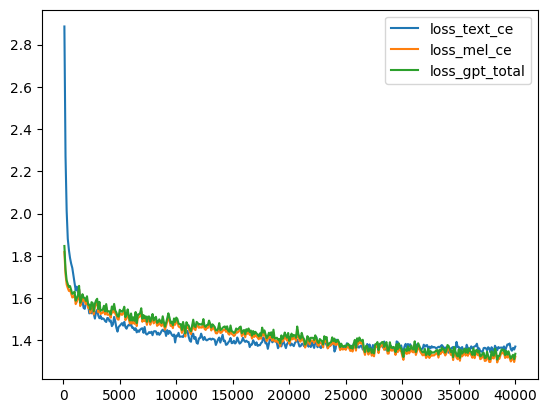

In [2]:
import os
from matplotlib import pyplot as plt

ROOT = os.getcwd()

dir = os.path.join(ROOT, "experiments", "Test1")
files = [(os.path.join(dir, file)) for file in os.listdir(dir) if ".log" in file]
file = files[0]
data = logData(file)

# loss_text_ce
# loss_mel_ce
# loss_gpt_total

iter = filterData(data, "iter")
loss_text_ce = filterData(data, "loss_text_ce")
loss_mel_ce = filterData(data, "loss_mel_ce")
loss_gpt_total = filterData(data, "loss_gpt_total")

plt.plot(iter, loss_text_ce, label="loss_text_ce")
plt.plot(iter, loss_mel_ce, label="loss_mel_ce")
plt.plot(iter, loss_gpt_total, label="loss_gpt_total")
plt.legend()
plt.show()